In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [201]:
print(os.listdir('../input/movie-review-sentiment-analysis-kernels-only/'))

['sampleSubmission.csv', 'test.tsv.zip', 'train.tsv.zip']


In [202]:
train_dir = pd.read_csv('../input/movie-review-sentiment-analysis-kernels-only/train.tsv.zip',sep='\t')
test_dir = pd.read_csv('../input/movie-review-sentiment-analysis-kernels-only/test.tsv.zip',sep='\t')

In [203]:
train_dir.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [204]:
train_dir['Sentiment'].unique()

array([1, 2, 3, 4, 0])

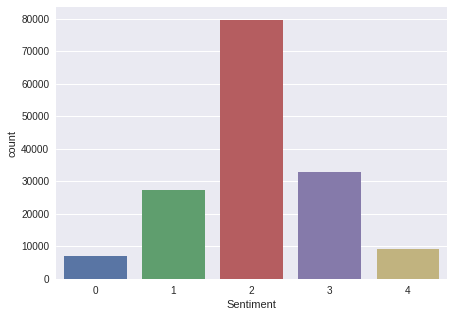

In [205]:
plt.style.use('seaborn')
plt.figure(figsize=(7,5))
sns.countplot(data=train_dir,x='Sentiment')

In [206]:
print(len(train_dir))
print(len(test_dir))

156060
66292


In [207]:
test_dir.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [208]:
train_dir

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [209]:
train_dir.isna().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [210]:
X = train_dir.drop('Sentiment',axis=1)
X

,PhraseId,SentenceId,Phrase
0,1,1,A series of escapades demonstrating the adage ...
1,2,1,A series of escapades demonstrating the adage ...
2,3,1,A series
3,4,1,A
4,5,1,series
...,...,...,...
156055,156056,8544,Hearst 's
156056,156057,8544,forced avuncular chortles
156057,156058,8544,avuncular chortles
156058,156059,8544,avuncular


In [211]:
y = train_dir['Sentiment']
y

0         1
1         2
2         2
3         2
4         2
         ..
156055    2
156056    1
156057    3
156058    2
156059    2
Name: Sentiment, Length: 156060, dtype: int64

In [212]:
import nltk
import re
from nltk.stem import WordNetLemmatizer

In [213]:
lemmatizer = WordNetLemmatizer()

In [214]:

corpus = []

for i in range(len(X)):
    text = re.sub('[^a-zA-Z]',' ',X['Phrase'][i])
    text = text.lower()
    text = text.split()
    
    text = [lemmatizer.lemmatize(word) for word in text if not word in nltk.corpus.stopwords.words('english')]
    text = ' '.join(text)
    corpus.append(text)

In [215]:
corpus

['series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story',
 'series escapade demonstrating adage good goose',
 'series',
 '',
 'series',
 'escapade demonstrating adage good goose',
 '',
 'escapade demonstrating adage good goose',
 'escapade',
 'demonstrating adage good goose',
 'demonstrating adage',
 'demonstrating',
 'adage',
 '',
 'adage',
 'good goose',
 '',
 'good goose',
 '',
 'good goose',
 '',
 'good goose',
 'good',
 'goose',
 '',
 'goose',
 'goose',
 'also good gander occasionally amuses none amount much story',
 'also good gander occasionally amuses none amount much story',
 'also',
 'also',
 'good gander occasionally amuses none amount much story',
 'gander occasionally amuses none amount much story',
 'gander occasionally amuses none amount much story',
 'gander',
 'gander',
 'gander',
 '',
 'occasionally amuses none amount much story',
 '',
 '',
 '',
 '',
 'occasionally amuses none amount much story',
 'occasionally',
 '

In [216]:
import keras 
from keras.utils import to_categorical

In [217]:
y = to_categorical(y)
y

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [218]:
ttest_dir = test_dir.drop('PhraseId',axis=1,inplace=True)

In [219]:
test_dir

,SentenceId,Phrase
0,8545,An intermittently pleasing but mostly routine ...
1,8545,An intermittently pleasing but mostly routine ...
2,8545,An
3,8545,intermittently pleasing but mostly routine effort
4,8545,intermittently pleasing but mostly routine
...,...,...
66287,11855,"A long-winded , predictable scenario ."
66288,11855,"A long-winded , predictable scenario"
66289,11855,"A long-winded ,"
66290,11855,A long-winded


In [220]:
test_corpus = []

for i in range(len(test_dir)):
    text = re.sub('[^a-zA-Z]',' ',test_dir['Phrase'][i])
    text = text.lower()
    text = text.split()
    
    text = [lemmatizer.lemmatize(word) for word in text if not word in nltk.corpus.stopwords.words('english')]
    text = ' '.join(text)
    test_corpus.append(text)

In [221]:
test_corpus

['intermittently pleasing mostly routine effort',
 'intermittently pleasing mostly routine effort',
 '',
 'intermittently pleasing mostly routine effort',
 'intermittently pleasing mostly routine',
 'intermittently pleasing',
 'intermittently pleasing',
 'intermittently',
 'pleasing',
 '',
 'mostly routine',
 'mostly',
 'routine',
 'effort',
 '',
 'kidman really thing worth watching birthday girl film stage trained jez butterworth lrb mojo rrb serf yet another example sad decline british comedy post full monty world',
 'kidman',
 'really thing worth watching birthday girl film stage trained jez butterworth lrb mojo rrb serf yet another example sad decline british comedy post full monty world',
 'really thing worth watching birthday girl film stage trained jez butterworth lrb mojo rrb serf yet another example sad decline british comedy post full monty world',
 'really',
 '',
 'really',
 'thing worth watching birthday girl film stage trained jez butterworth lrb mojo rrb serf yet another 

In [222]:
word2count = {}

for sentence in corpus:
    words = nltk.word_tokenize(sentence)
    
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [223]:
len(word2count)

13625

In [224]:
import heapq

In [225]:
word_freq = heapq.nlargest(5000,word2count,key=word2count.get)

In [226]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM,Dropout
from keras.preprocessing.text import one_hot

In [227]:
vocab_size = len(word_freq)
one_hot_train = []
for sentences in corpus:
    Z = one_hot(sentences,vocab_size)
    one_hot_train.append(Z)

In [228]:
one_hot_train[:5]

[[1796,
  2717,
  4128,
  2509,
  989,
  2280,
  2539,
  989,
  2422,
  118,
  2919,
  2427,
  3210,
  4261,
  703],
 [1796, 2717, 4128, 2509, 989, 2280],
 [1796],
 [],
 [1796]]

In [229]:
one_hot_test = []
for sentences in test_corpus:
    Z = one_hot(sentences,vocab_size)
    one_hot_test.append(Z)

In [230]:
one_hot_test[:2]

[[4175, 4878, 780, 1747, 1911], [4175, 4878, 780, 1747, 1911]]

In [231]:
length = 20
train_embedded_sents = pad_sequences(one_hot_train,padding='pre',maxlen=length)

In [232]:
test_embedded_sents = pad_sequences(one_hot_test,padding='pre',maxlen=length)

In [233]:
train_embedded_sents[:2]

array([[   0,    0,    0,    0,    0, 1796, 2717, 4128, 2509,  989, 2280,
        2539,  989, 2422,  118, 2919, 2427, 3210, 4261,  703],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 1796, 2717, 4128, 2509,  989, 2280]],
      dtype=int32)

In [234]:
test_embedded_sents[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 4175, 4878,  780, 1747, 1911],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 4175, 4878,  780, 1747, 1911]],
      dtype=int32)

In [235]:
embedding_feature_vectors = 40
model = Sequential()
model.add(Embedding(vocab_size,embedding_feature_vectors,input_length=length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(5,activation='softmax'))

In [236]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [237]:
X_final = np.asarray(train_embedded_sents)
y_final = np.asarray(y)

In [238]:
from sklearn.model_selection import train_test_split

In [239]:
X_train,X_valid,y_train,y_valid = train_test_split(X_final,y_final,test_size=0.2)

In [240]:
len(X_train)

124848

In [241]:
len(X_valid)

31212

In [242]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=20,batch_size=128)

ValueError: Error when checking target: expected dense_4 to have shape (1,) but got array with shape (5,)

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 21), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 21), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 21), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 21), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training Accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation Accuracy vs Epochs')
plt.show()

In [ ]:
test = np.asarray(test_embedded_sents)
test

In [ ]:
sub = pd.read_csv('../input/movie-review-sentiment-analysis-kernels-only/sampleSubmission.csv')

In [ ]:
sub['labels'] = model.predict_classes(test,batch_size=128)
sub

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
score = accuracy_score(sub['Sentiment'],sub['labels'])
print(score)